In [1]:
%matplotlib inline
import numpy as np

from numpy.random import normal
from random import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from brainsignals.plotting_convention import mark_subplots

def adjust_spines(ax, visible_spines):
    ax.label_outer(remove_inner_ticks=True)
    #ax.grid(color='0.9')

    for loc, spine in ax.spines.items():
        if loc in visible_spines:
            spine.set_position(('outward', 10))  # outward by 10 points
        else:
            spine.set_visible(False)

def distribution(N, d, distribution='Uniform'):
    
    if distribution == 'Uniform':
        z = np.zeros(N)
        for i in range(N): 
            z[i] = d*random() - d/2
    elif distribution == 'Normal':
        z = normal(0, d*0.341, N)
    
    return z
      
  
def set_xyz(N, d, r_p):
    z = distribution(N, d, distribution='Normal')
    x = np.zeros(N)
    y = np.zeros(N)

    for i in range(N):
        r_n = r_p*np.sqrt(random())
        theta = random()*2*np.pi
        x[i] = r_n*np.cos(theta)
        y[i] = r_n*np.sin(theta)
    
    return x, y, z # (µm)

def dipole_potential(elec_locs, dipole_pos, p):
    # Potential in infinite homogeneous medium
    r_ = elec_locs - dipole_pos.T
    min_dist = 50 # 
    for r_idx, xyz  in enumerate(r_):
        if np.sqrt(xyz[0]**2 + xyz[1]**2 + xyz[2]**2) < min_dist: # (µm)
            r_[r_idx][2] = np.sqrt(min_dist**2 - xyz[0]**2 - xyz[1]**2)
            #print("ADJUSTED")
    V_e = 1000 * 1. / (4 * np.pi * sigma) * (np.dot(r_, p.T)
                    / np.linalg.norm(r_, axis=1) ** 3)
    return V_e

def get_V_at_z(dipole_loc, z_plot):
    V_plot = []
    V_abs = []
    k = None
    for i in z_plot:
        if i % 400 == 0 and k != round(list(z_plot).index(i)/len(z_plot)*100):
            print(f'{round(list(z_plot).index(i)/len(z_plot)*100)} %')
            k = round(list(z_plot).index(i)/len(z_plot)*100)
        
        r_elecs = np.array([0, 0, i])  # (µm)
        V_p = dipole_potential(r_elecs, dipole_loc.T, p[:, 0])
        
        V_plot.append(sum(V_p))
        V_abs.append(abs(sum(V_p)))
    return V_plot, V_abs

In [2]:
np.random.seed(123)

sigma = 0.276 # (S/m)
r_p = 500 # (µm)
d = 300 # (µm)
rho = 10**(5) # (celler/mmˆ3)
N = int(rho*d*10**(-3)*np.pi*(r_p*10**(-3))**2)

sep = 10
z_plot = np.arange(-2000, 2000 + sep, sep)

# Baseline
cdm_amp = 125 # (nA µm)
p = np.array([[0.], [0.], [cdm_amp]])  # (nA µm)

dipole_loc = np.array(set_xyz(N, d, r_p)) # 
V_plot_1, V_abs_1 = get_V_at_z(dipole_loc.T, z_plot)

# Alternative
cdm_amp = 190 # (nA µm)
p = np.array([[0.], [0.], [cdm_amp]])  # (nA µm)

dipole_loc = np.array(set_xyz(N, d, r_p)) # 
V_plot_2, V_abs_2 = get_V_at_z(dipole_loc.T, z_plot)


0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %
0 %
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


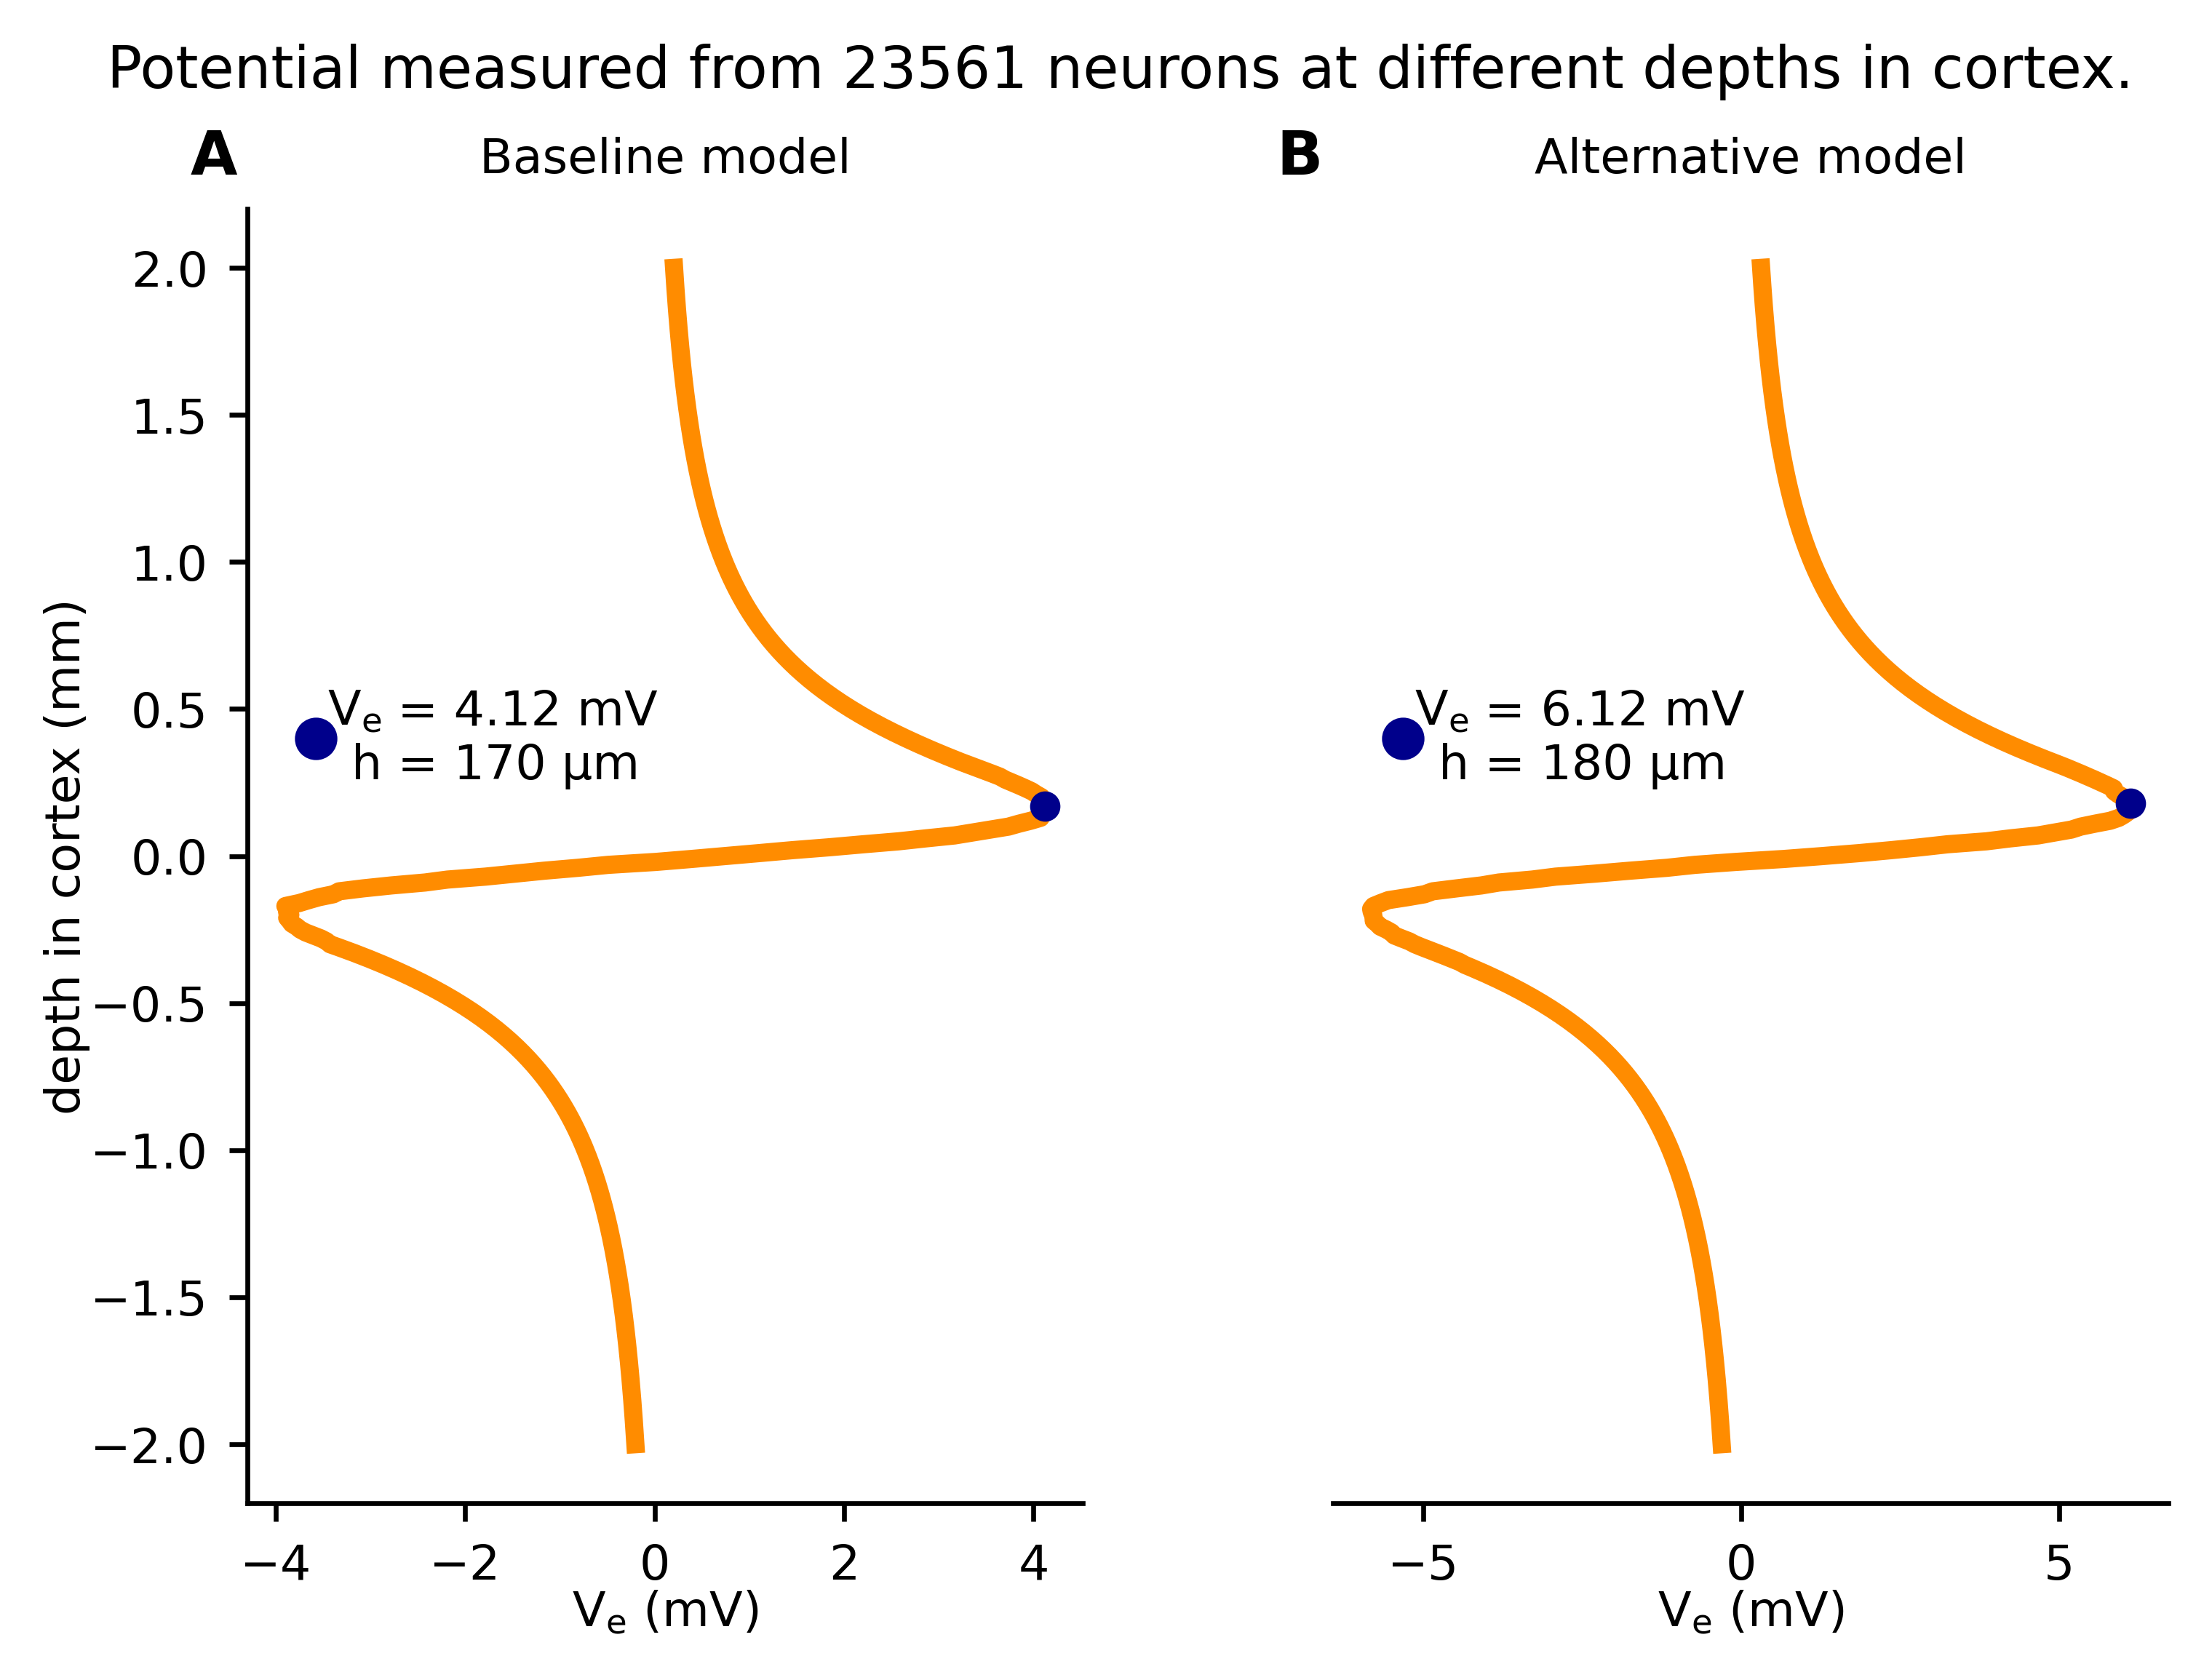

In [3]:
fig = plt.figure(figsize=(5, 3.8))
fig.subplots_adjust(bottom=0.1, right=0.98, left=0.1,
                    top=0.88, wspace=.3, hspace=0.35)
ax1 = fig.add_subplot(121, title=f'Baseline model',
                     xlabel='V$_{\mathrm{e}}$ (mV)',
                     ylabel='depth in cortex (mm)')
ax2 = fig.add_subplot(122, title=f'Alternative model',
                     xlabel='V$_{\mathrm{e}}$ (mV)', yticks=[])

fig.suptitle(f"Potential measured from {N} neurons at different depths in cortex.")
#ax1.grid(which='major', alpha=0.3)
ax1.plot(np.array(V_plot_1)*10**(-3), z_plot*10**(-3), c='darkorange', linewidth=3)

idx = V_abs_1.index(max(V_abs_1))

ax1.plot(V_plot_1[idx]*10**(-3), z_plot[idx]*10**(-3), marker='o', ms=4, c='darkblue')
s = 'V$_{\mathrm{e}}$'
h = z_plot[idx]
ax1.text(-abs(0.7*V_plot_1[idx]*10**(-3)), 0.2*max(z_plot)*10**(-3), f'{s}\nh', 
        va="center", ha="right")
ax1.text(-abs(0.7*V_plot_1[idx]*10**(-3)), 0.2*max(z_plot)*10**(-3), 
        f' = {round(V_plot_1[idx]*10**(-3), 2)} mV\n = {z_plot[idx]} µm',
        va="center", ha="left")
ax1.plot(-abs(0.87*V_plot_1[idx]*10**(-3)), 0.2*max(z_plot)*10**(-3), marker='o', ms=6, c='darkblue')
# ax.text(-abs(0.8*V_plot[idx]*10**(-3)), 0.20*max(z_plot)*10**(-3), f'height = {0} mV'.format(round(V_plot[idx]*10**(-3),2), s))

#————————

#ax2.grid(visible=True, axis='both', alpha=0.3)
ax2.plot(np.array(V_plot_2)*10**(-3), z_plot*10**(-3), c='darkorange', linewidth=3)

idx = V_abs_2.index(max(V_abs_2))

ax2.plot(V_plot_2[idx]*10**(-3), z_plot[idx]*10**(-3), marker='o', ms=4, c='darkblue')
s = 'V$_{\mathrm{e}}$'
h = z_plot[idx]
ax2.text(-abs(0.7*V_plot_2[idx]*10**(-3)), 0.2*max(z_plot)*10**(-3), f'{s}\nh', 
        va="center", ha="right")
ax2.text(-abs(0.7*V_plot_2[idx]*10**(-3)), 0.2*max(z_plot)*10**(-3), 
        f' = {round(V_plot_2[idx]*10**(-3), 2)} mV\n = {z_plot[idx]} µm',
        va="center", ha="left")
ax2.plot(-abs(0.87*V_plot_2[idx]*10**(-3)), 0.2*max(z_plot)*10**(-3), marker='o', ms=6, c='darkblue')
# ax.text(-abs(0.8*V_plot[idx]*10**(-3)), 0.20*max(z_plot)*10**(-3), f'height = {0} mV'.format(round(V_plot[idx]*10**(-3),2), s))

ax1.spines.top.set_visible(False)
ax1.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.right.set_visible(False)
ax2.spines.left.set_visible(False)

mark_subplots(ax1, "A", xpos=-0.04, ypos=1.04)
mark_subplots(ax2, "B", xpos=-0.04, ypos=1.04)

plt.savefig('cortical_depth.pdf')